<a href="https://colab.research.google.com/github/srikharshashi/learn-dl/blob/main/data_augementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it


228813984/228813984 [==============================] - 2s 0us/step


In [3]:
data_dir


'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir


PosixPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]


[PosixPath('datasets/flower_photos/roses/12243068283_ee4c2683e2_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6036837996_7fbdcdb3c5_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4804011140_7defedf4b7_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8642943283_47e44d049d_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3576488381_611f3446e0_n.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)


3670


In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]


[PosixPath('datasets/flower_photos/roses/12243068283_ee4c2683e2_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6036837996_7fbdcdb3c5_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4804011140_7defedf4b7_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8642943283_47e44d049d_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3576488381_611f3446e0_n.jpg')]

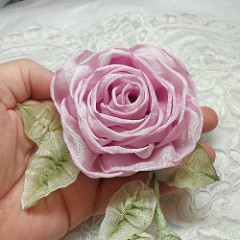

In [9]:
PIL.Image.open(str(roses[3]))


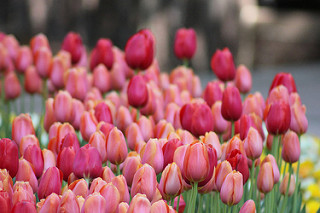

In [10]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))


In [11]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}


In [12]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}


In [13]:
flowers_images_dict['roses'][:5]


[PosixPath('datasets/flower_photos/roses/12243068283_ee4c2683e2_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6036837996_7fbdcdb3c5_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4804011140_7defedf4b7_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8642943283_47e44d049d_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3576488381_611f3446e0_n.jpg')]

In [14]:
str(flowers_images_dict['roses'][0])
#Converting to string will give us the full path  

'datasets/flower_photos/roses/12243068283_ee4c2683e2_n.jpg'

In [15]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))


In [18]:
img.shape

(234, 320, 3)

In [19]:
cv2.resize(img,(180,180)).shape


(180, 180, 3)

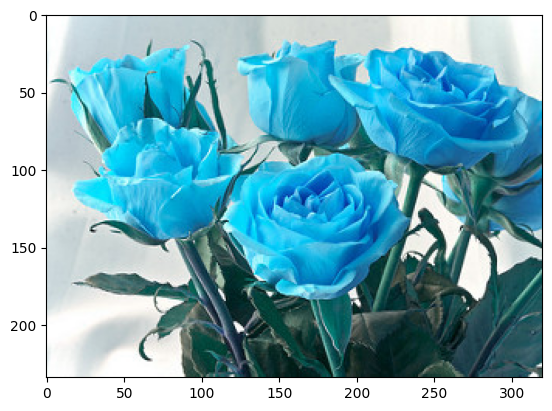

In [21]:
plt.imshow(img)

In [23]:
X,y=[],[]


for flower_type,paths in flowers_images_dict.items():
  for path in paths:
    img=cv2.imread(str(path))
    resized_img=cv2.resize(img,(180,180))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_type])



In [24]:
X=np.array(X)
y=np.array(y)


**Train Test Split**

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


**Pre-Process Stuff**

In [27]:
# Scaling the data 
X.max(),X.min()

(255, 0)

In [31]:
# Let us get the values betweeen 0-1 instead of 0-255
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [32]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)              


Epoch 1/30
86/86 [==============================] - 14s 20ms/step - loss: 1.2988 - accuracy: 0.4495
Epoch 2/30
86/86 [==============================] - 2s 20ms/step - loss: 1.0020 - accuracy: 0.5952
Epoch 3/30
86/86 [==============================] - 2s 19ms/step - loss: 0.8657 - accuracy: 0.6552
Epoch 4/30
86/86 [==============================] - 2s 20ms/step - loss: 0.7006 - accuracy: 0.7445
Epoch 5/30
86/86 [==============================] - 2s 22ms/step - loss: 0.4776 - accuracy: 0.8270
Epoch 6/30
86/86 [==============================] - 2s 20ms/step - loss: 0.2904 - accuracy: 0.9037
Epoch 7/30
86/86 [==============================] - 2s 20ms/step - loss: 0.1708 - accuracy: 0.9433
Epoch 8/30
86/86 [==============================] - 2s 19ms/step - loss: 0.1237 - accuracy: 0.9618
Epoch 9/30
86/86 [==============================] - 2s 19ms/step - loss: 0.0439 - accuracy: 0.9920
Epoch 10/30
86/86 [==============================] - 2s 19ms/step - loss: 0.0290 - accuracy: 0.9927
Epoch 11

In [33]:
model.evaluate(X_test,y_test)

29/29 [==============================] - 1s 15ms/step - loss: 889.1188 - accuracy: 0.5795


[889.1187744140625, 0.5795207023620605]

As we can see the test accuracy is 58% where as train is a 100%
This is data being overfit and we need to reduce this by augmenting our data as well as using DropOut Layers

In [38]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)


In [40]:
num_classes = 5

model2 = Sequential([
  data_augmentation,#extra augmentation layer
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2), #Extra Layer
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation="softmax")
])

model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model2.fit(X_train_scaled, y_train, epochs=30)     

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


86/86 [==============================] - 6s 30ms/step - loss: 1.4541 - accuracy: 0.3717
Epoch 2/30
86/86 [==============================] - 2s 28ms/step - loss: 1.0859 - accuracy: 0.5669
Epoch 3/30
86/86 [==============================] - 2s 28ms/step - loss: 1.0027 - accuracy: 0.6072
Epoch 4/30
86/86 [==============================] - 2s 28ms/step - loss: 0.9089 - accuracy: 0.6559
Epoch 5/30
86/86 [==============================] - 3s 30ms/step - loss: 0.8543 - accuracy: 0.6810
Epoch 6/30
86/86 [==============================] - 2s 28ms/step - loss: 0.8250 - accuracy: 0.6879
Epoch 7/30
86/86 [==============================] - 2s 28ms/step - loss: 0.7845 - accuracy: 0.6908
Epoch 8/30
86/86 [==============================] - 2s 28ms/step - loss: 0.7403 - accuracy: 0.7104
Epoch 9/30
86/86 [==============================] - 2s 28ms/step - loss: 0.7373 - accuracy: 0.7260
Epoch 10/30
86/86 [==============================] - 2s 28ms/step - loss: 0.6993 - accuracy: 0.7326
Epoch 11/30
86/86 [=

In [41]:
model2.evaluate(X_test_scaled,y_test)

 6/29 [=====>........................] - ETA: 0s - loss: 0.9289 - accuracy: 0.7083

/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


29/29 [==============================] - 1s 12ms/step - loss: 0.8454 - accuracy: 0.7233


[0.8454023003578186, 0.7233115434646606]

As seen the over fitting has been reduced considerably 